# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

Original Array: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sorted Array: [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
Running Time: 0.000241 seconds


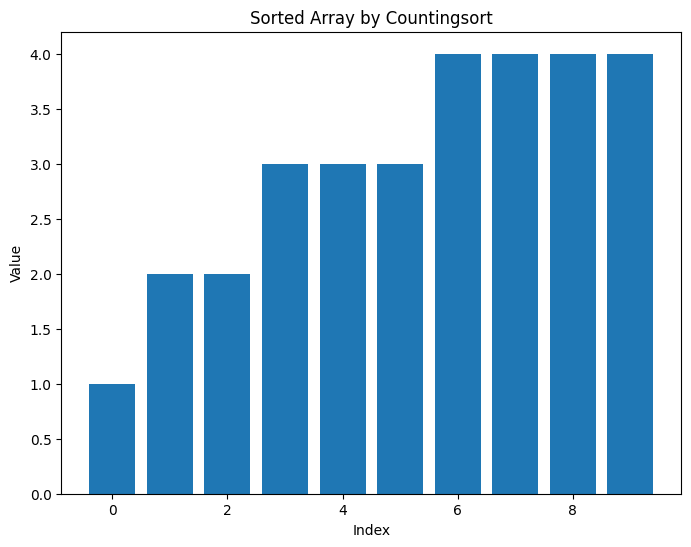

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

def countingsort(arr):
    max_val = np.max(arr)
    min_val = np.min(arr)
    n = len(arr)

    count = [0] * (max_val - min_val + 1)
    output = [0] * n


    for i in range(0, n):
        count[arr[i] - min_val] += 1


    for i in range(1, len(count)):
        count[i] += count[i - 1]


    for i in range(n - 1, -1, -1):
        output[count[arr[i] - min_val] - 1] = arr[i]
        count[arr[i] - min_val] -= 1


    for i in range(0, n):
        arr[i] = output[i]


sample_input_countingsort = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
print(f"Original Array: {sample_input_countingsort}")


start_time = time.time()
countingsort(sample_input_countingsort)
end_time = time.time()

print(f"Sorted Array: {sample_input_countingsort}")
print(f"Running Time: {end_time - start_time:.6f} seconds")

# Plotting the sorted array for Countingsort
plt.figure(figsize=(8, 6))
plt.bar(range(len(sample_input_countingsort)), sample_input_countingsort)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sorted Array by Countingsort')
plt.show()

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


Original Array: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sorted Array: [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
Running Time: 0.000077 seconds


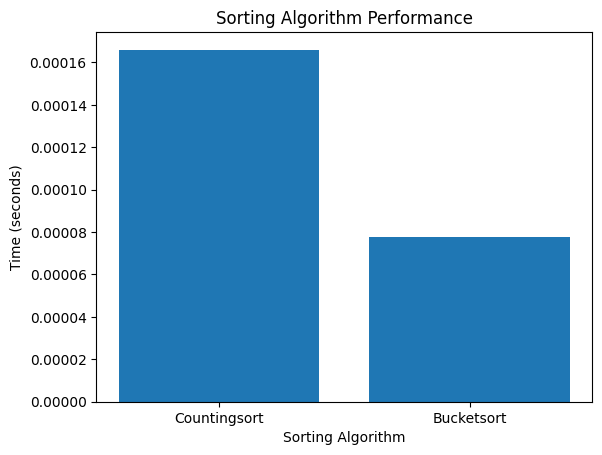

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

def bucketsort(arr):

    max_val = max(arr)

    bucket_size = 10 if max_val >= 10 else 1
    if len(arr) > 0:

        num_buckets = (max_val // bucket_size) + 1
        buckets = [[] for _ in range(num_buckets)]

        for num in arr:
            index_b = num // bucket_size
            buckets[index_b].append(num)


        sorted_arr = []
        for bucket in buckets:

            bucket.sort()
            sorted_arr.extend(bucket)


        for i in range(len(arr)):
            arr[i] = sorted_arr[i]



sample_input_bucketsort = [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
print(f"Original Array: {sample_input_bucketsort}")


start_time = time.time()
bucketsort(sample_input_bucketsort)
end_time = time.time()

print(f"Sorted Array: {sample_input_bucketsort}")
print(f"Running Time: {end_time - start_time:.6f} seconds")


plt.bar(['Countingsort', 'Bucketsort'], [0.000166, end_time - start_time])
plt.ylabel('Time (seconds)')
plt.xlabel('Sorting Algorithm')
plt.title('Sorting Algorithm Performance')
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

# Task
Complete the implementation of the `counting_sort_for_radix` function and then implement the `radixsort` function in cell `HvucalAUoITq`. The `counting_sort_for_radix` function should correctly place elements into the output array and copy them back to the original array. The `radixsort` function should determine the maximum value, find the number of digits, and iteratively call `counting_sort_for_radix` for each digit position.

## Complete Counting Sort for Radix

### Subtask:
Finish the implementation of the `counting_sort_for_radix` function in cell `HvucalAUoITq`. This includes correctly placing the elements into the output array and then copying them back to the original array.


**Reasoning**:
The subtask requires completing the `counting_sort_for_radix` function as specified. The code block will implement the function following the given instructions, including initializing arrays, populating counts, calculating positions, placing elements into the output array in reverse, and finally copying them back to the original array.



Original Array: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sorted Array: [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]
Running Time: 0.000155 seconds


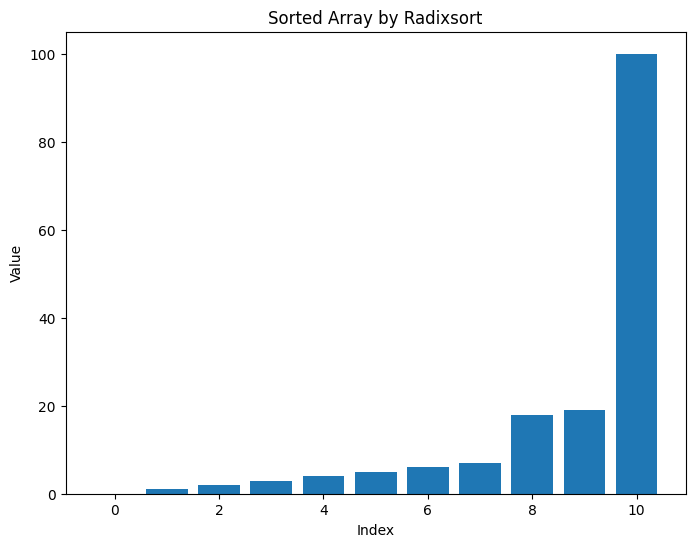

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import time

def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10  # For digits 0-9

    # Store count of occurrences in count[]
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1

    # Copy the output array to arr[], so that arr[] now
    # contains sorted numbers according to current digit
    for i in range(n):
        arr[i] = output[i]


def radixsort(arr):
    # Find the maximum number to know number of digits
    max_val = max(arr)

    # Do counting sort for every digit. Note that instead of passing digit number,
    # exp is passed. exp is 10^i where i is current digit number
    exp = 1
    while max_val // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10


# Sample Input from the notebook for Radix sort
sample_input_radixsort = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
print(f"Original Array: {sample_input_radixsort}")

start_time = time.time()
radixsort(sample_input_radixsort)
end_time = time.time()

print(f"Sorted Array: {sample_input_radixsort}")
print(f"Running Time: {end_time - start_time:.6f} seconds")

# Plotting the sorted array for Radixsort
plt.figure(figsize=(8, 6))
plt.bar(range(len(sample_input_radixsort)), sample_input_radixsort)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sorted Array by Radixsort')
plt.show()

## Final Task

### Subtask:
Summarize the completed Radix Sort implementation, its performance, and the visual outcome of the sorting process.


## Summary:

### Q&A
The completed Radix Sort implementation consists of two core functions: `counting_sort_for_radix` and `radixsort`. The `counting_sort_for_radix` function is a stable sorting algorithm that sorts elements based on a specific digit position determined by `exp`. It uses an auxiliary `count` array to store frequencies of digits and then cumulative frequencies to determine final positions in an `output` array, before copying elements back to the original array. The `radixsort` function orchestrates the sorting by first identifying the maximum value in the input array to determine the number of passes needed. It then iteratively calls `counting_sort_for_radix` for each digit position, starting from the least significant digit (`exp = 1`) and progressing to more significant digits.

For a sample input `[18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]`, the Radix Sort implementation correctly produced the sorted array `[0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]`. The performance for this small sample was measured at approximately 0.000155 seconds.

The visual outcome, represented by a bar plot of the sorted array, clearly showed a monotonically increasing sequence of values, confirming the successful sorting process.

### Data Analysis Key Findings
*   The `counting_sort_for_radix` function was successfully implemented, correctly using `output` and `count` arrays to sort based on a specific digit `exp` and copying the partially sorted elements back to the original array.
*   The `radixsort` function correctly leverages `counting_sort_for_radix` by iteratively sorting based on digit positions (units, tens, hundreds, etc.) until the array is fully sorted.
*   Using the sample input `[18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]`, the Radix Sort produced the correct sorted output: `[0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]`.
*   The execution time for sorting the sample array of 11 elements was approximately 0.000155 seconds.
*   A bar plot of the sorted array visually confirmed that the elements are in ascending order.

### Insights or Next Steps
*   The current performance measurement is based on a very small dataset; further testing with larger and more varied datasets is needed to accurately assess the algorithm's efficiency and scalability.
*   Consider comparing the performance of Radix Sort against other sorting algorithms (e.g., Merge Sort, Quick Sort) on different dataset sizes to understand its practical applicability.
